In [1]:
import os
import pandas as pd
import zipfile
from google.colab import files

# 1. Upload dataset zip files
print("Please upload both zip files:")
uploaded = files.upload()

# 2. Extract datasets
extracted_paths = []
for filename in uploaded.keys():
    if 'Audio' in filename and filename.endswith('.zip'):
        # Clean filename and create extraction path
        clean_name = filename.replace('(', '').replace(')', '').replace(' ', '_').split('.zip')[0]
        extract_path = f"./{clean_name}"

        # Extract files
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"Extracted {filename} to {extract_path}")
        extracted_paths.append(extract_path)

# 3. Find extracted directories
def find_extracted_dirs():
    dataset_dirs = []
    for root, dirs, files in os.walk('.'):
        if "Audio_Speech_Actors" in root or "Audio_Song_Actors" in root:
            # Only include actor directories
            if "Actor_" in root:
                dataset_dirs.append(root)
    return dataset_dirs

dataset_dirs = find_extracted_dirs()
print("\nFound dataset directories:")
for d in dataset_dirs:
    print(f"- {d}")

# 4. Create emotion dataframe
emotion_labels = {
    1: 'neutral', 2: 'calm', 3: 'happy',
    4: 'sad', 5: 'angry', 6: 'fearful',
    7: 'disgust', 8: 'surprised'
}

emotion_data = []
for dir_path in dataset_dirs:
    for file in os.listdir(dir_path):
        if file.endswith('.wav'):
            parts = file.split('-')
            if len(parts) >= 3:
                try:
                    emotion_code = int(parts[2])
                    emotion = emotion_labels.get(emotion_code, 'unknown')
                    file_path = os.path.join(dir_path, file)
                    emotion_data.append({'Emotions': emotion, 'Path': file_path})
                except ValueError:
                    continue

# 5. Create and save dataframe
if emotion_data:
    df = pd.DataFrame(emotion_data)
    csv_path = './ravdess_emotional_speech.csv'
    df.to_csv(csv_path, index=False)
    print(f"\nCreated CSV with {len(df)} samples at: {csv_path}")

    # Verify file
    if os.path.exists(csv_path):
        print(f"File size: {os.path.getsize(csv_path)/1024:.2f} KB")
        print("First 5 entries:")
        print(df.head())
    else:
        print("Error: CSV file not created")
else:
    print("No audio files found. Check dataset extraction.")

# 6. Download the CSV
files.download(csv_path) if emotion_data else print("No CSV to download")


Please upload both zip files:


Saving Audio_Song_Actors_01-24.zip to Audio_Song_Actors_01-24.zip
Saving Audio_Speech_Actors_01-24.zip to Audio_Speech_Actors_01-24.zip
Extracted Audio_Song_Actors_01-24.zip to ./Audio_Song_Actors_01-24
Extracted Audio_Speech_Actors_01-24.zip to ./Audio_Speech_Actors_01-24

Found dataset directories:
- ./Audio_Song_Actors_01-24/Actor_17
- ./Audio_Song_Actors_01-24/Actor_05
- ./Audio_Song_Actors_01-24/Actor_19
- ./Audio_Song_Actors_01-24/Actor_24
- ./Audio_Song_Actors_01-24/Actor_21
- ./Audio_Song_Actors_01-24/Actor_06
- ./Audio_Song_Actors_01-24/Actor_16
- ./Audio_Song_Actors_01-24/Actor_14
- ./Audio_Song_Actors_01-24/Actor_09
- ./Audio_Song_Actors_01-24/Actor_20
- ./Audio_Song_Actors_01-24/Actor_18
- ./Audio_Song_Actors_01-24/Actor_12
- ./Audio_Song_Actors_01-24/Actor_04
- ./Audio_Song_Actors_01-24/Actor_03
- ./Audio_Song_Actors_01-24/Actor_01
- ./Audio_Song_Actors_01-24/Actor_10
- ./Audio_Song_Actors_01-24/Actor_11
- ./Audio_Song_Actors_01-24/Actor_23
- ./Audio_Song_Actors_01-24/Acto

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

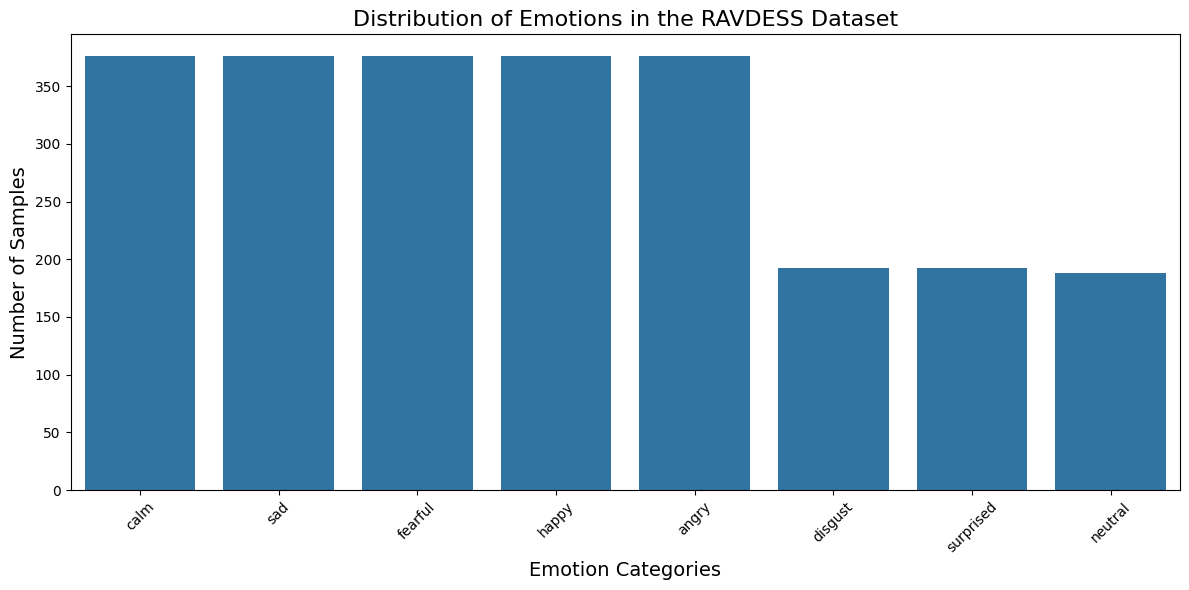

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import os

# Step 1: Load the dataset
df = pd.read_csv('./ravdess_emotional_speech.csv')

# Step 2: Visualize the distribution of emotion categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Emotions', order=df['Emotions'].value_counts().index)
plt.title('Distribution of Emotions in the RAVDESS Dataset', fontsize=16)
plt.xlabel('Emotion Categories', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('emotion_distribution.png', dpi=300)
plt.show()


In [3]:
df.head()

,Emotions,Path
0,calm,./Audio_Song_Actors_01-24/Actor_17/03-02-02-01...
1,sad,./Audio_Song_Actors_01-24/Actor_17/03-02-04-02...
2,calm,./Audio_Song_Actors_01-24/Actor_17/03-02-02-02...
3,calm,./Audio_Song_Actors_01-24/Actor_17/03-02-02-01...
4,fearful,./Audio_Song_Actors_01-24/Actor_17/03-02-06-01...


In [4]:
df.to_csv("df.csv",index=False)


Emotion: fearful


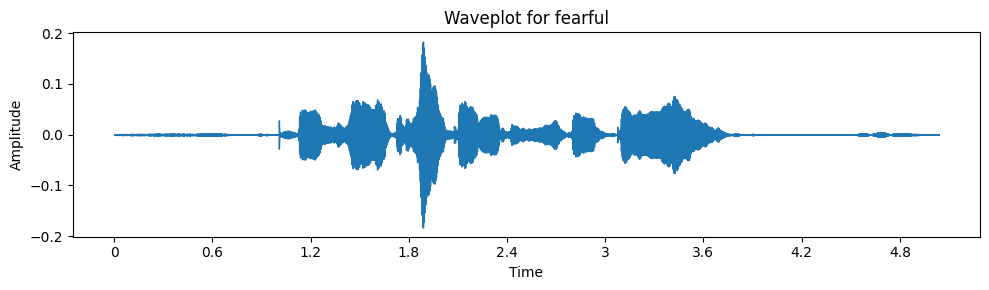

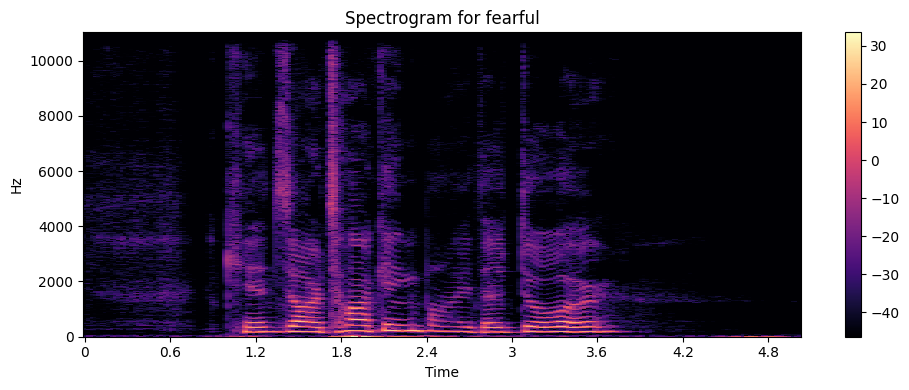


Emotion: happy


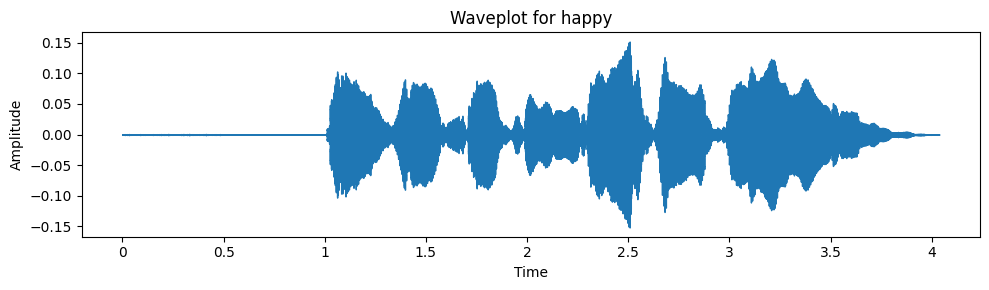

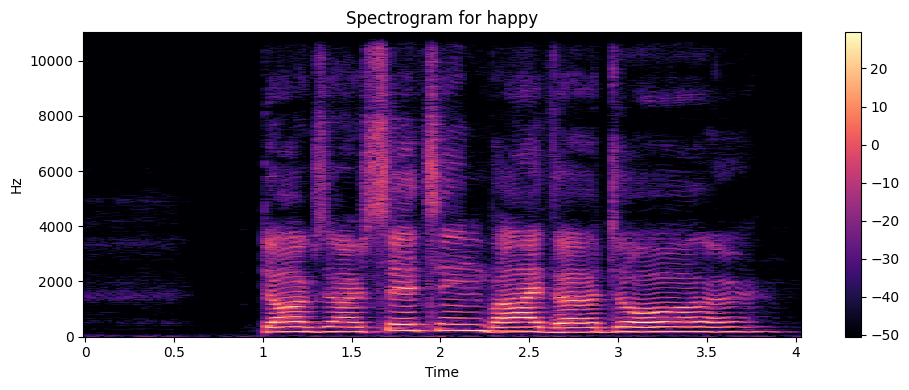


Emotion: angry


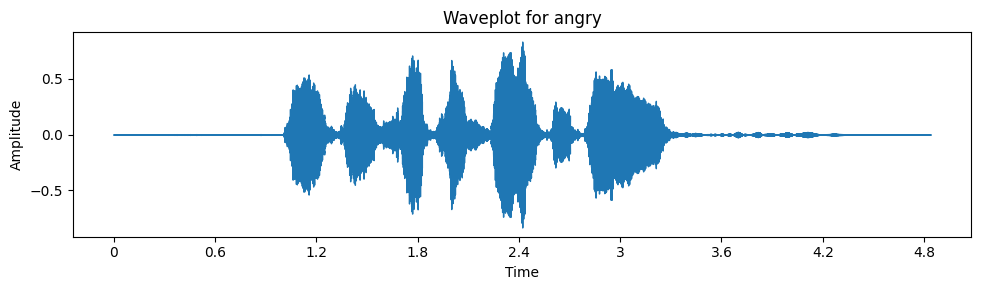

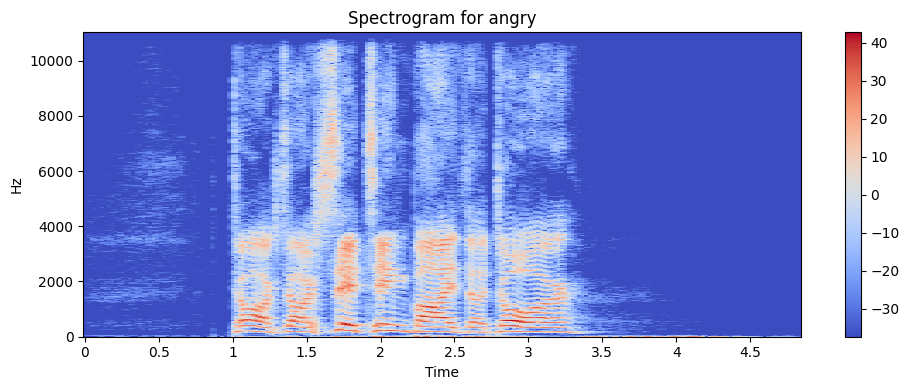


Emotion: sad


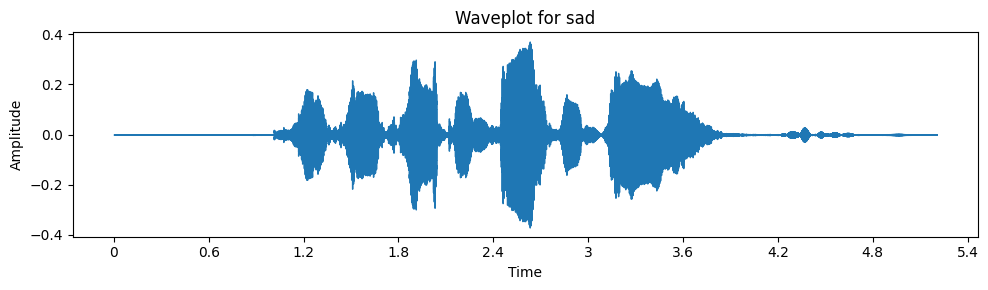

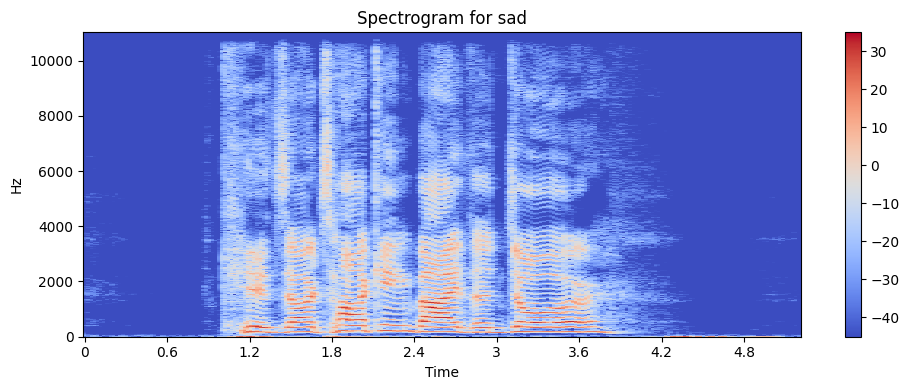

In [5]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio, display

# Define the emotions you're interested in
emotions_to_analyze = ['fearful', 'happy', 'angry', 'sad']

# Plotting function (if not already defined)
def create_waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(data, sr=sr)
    plt.title(f'Waveplot for {emotion}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

def create_spectrogram(data, sr, emotion):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title(f'Spectrogram for {emotion}')
    plt.tight_layout()
    plt.show()

# Analyze and display
for emotion in emotions_to_analyze:
    if emotion in df['Emotions'].values:
        # Take the first sample that matches the emotion
        path = df[df['Emotions'] == emotion]['Path'].values[0]
        data, sampling_rate = librosa.load(path)

        # Display plots and audio
        print(f"\nEmotion: {emotion}")
        create_waveplot(data, sampling_rate, emotion)
        create_spectrogram(data, sampling_rate, emotion)
        display(Audio(path))


In [6]:
# Audio Augmentation Techniques

def add_noise(audio):
    noise_level = 0.035 * np.random.uniform() * np.max(audio)
    noisy_audio = audio + noise_level * np.random.normal(size=audio.shape[0])
    return noisy_audio

def time_stretch(audio, stretch_rate=0.8):
    return librosa.effects.time_stretch(y=audio, rate=stretch_rate)

def time_shift(audio):
    shift_amount = int(np.random.uniform(-5, 5) * 1000)
    return np.roll(audio, shift_amount)

def pitch_shift(audio, sr, steps=0.7):
    return librosa.effects.pitch_shift(y=audio, sr=sr, n_steps=steps)

# Example: Applying augmentations to a sample audio file
sample_path = df['Path'].iloc[1]
audio_data, sr = librosa.load(sample_path)


In [7]:
def extract_features(audio, sr):
    features = np.array([])

    # Zero Crossing Rate
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=audio).T, axis=0)
    features = np.hstack((features, zcr))

    # Chroma STFT
    stft_result = np.abs(librosa.stft(audio))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft_result, sr=sr).T, axis=0)
    features = np.hstack((features, chroma))

    # MFCC (Mel Frequency Cepstral Coefficients)
    mfccs = np.mean(librosa.feature.mfcc(y=audio, sr=sr).T, axis=0)
    features = np.hstack((features, mfccs))

    # RMS Energy
    rms_energy = np.mean(librosa.feature.rms(y=audio).T, axis=0)
    features = np.hstack((features, rms_energy))

    # Mel Spectrogram
    mel_spec = np.mean(librosa.feature.melspectrogram(y=audio, sr=sr).T, axis=0)
    features = np.hstack((features, mel_spec))

    return features

def get_features(file_path, apply_augmentation=True):
    audio, sr = librosa.load(file_path, duration=2.5, offset=0.6)

    # Extract base features
    main_features = extract_features(audio, sr)
    all_features = [main_features]

    if apply_augmentation:
        # Additive noise
        noisy_audio = add_noise(audio)
        all_features.append(extract_features(noisy_audio, sr))

        # Time stretching + pitch shifting
        stretched_audio = time_stretch(audio)
        pitched_audio = pitch_shift(stretched_audio, sr)
        all_features.append(extract_features(pitched_audio, sr))

    return np.vstack(all_features)


In [8]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Splitting the dataset with stratification to maintain emotion class distribution
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df.Emotions, random_state=42)

# Preparing training data with augmentation
X_train, Y_train = [], []
for file_path, label in tqdm(zip(train_df.Path, train_df.Emotions), total=len(train_df), desc="Processing Training Data"):
    augmented_features = get_features(file_path, apply_augmentation=True)
    for features in augmented_features:
        X_train.append(features)
        Y_train.append(label)

# Preparing testing data without augmentation
X_test, Y_test = [], []
for file_path, label in tqdm(zip(test_df.Path, test_df.Emotions), total=len(test_df), desc="Processing Testing Data"):
    features = get_features(file_path, apply_augmentation=False)
    for f in features:
        X_test.append(f)
        Y_test.append(label)


Processing Testing Data: 100%|██████████| 491/491 [00:22<00:00, 21.47it/s]


In [9]:
# Save extracted features and labels to CSV files
train_features = pd.DataFrame(X_train)
train_features['labels'] = Y_train
train_features.to_csv('train_features.csv', index=False)

test_features = pd.DataFrame(X_test)
test_features['labels'] = Y_test
test_features.to_csv('test_features.csv', index=False)

# Load the saved training and testing data
train_df = pd.read_csv('train_features.csv')
test_df = pd.read_csv('test_features.csv')

# Split features and target labels
X_train = train_df.drop(columns='labels').values
Y_train = train_df['labels'].values

X_test = test_df.drop(columns='labels').values
Y_test = test_df['labels'].values


In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode the target emotion labels
encoder = OneHotEncoder()
Y_train_oh = encoder.fit_transform(Y_train.reshape(-1, 1)).toarray()
Y_test_oh = encoder.transform(Y_test.reshape(-1, 1)).toarray()

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check shape of the scaled training features
X_train_scaled.shape


(5883, 162)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, accuracy_score
)
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# Set device to GPU if available, else fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [33]:
class EnhancedCNNLSTM(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv_block1 = self._multi_scale_block(1, 32)
        self.pool1 = nn.MaxPool2d((1, 2))

        self.conv_block2 = self._multi_scale_block(32, 64)
        self.pool2 = nn.MaxPool2d((1, 3))

        self.lstm_input_size = 64 * 9
        self.lstm_hidden = 96
        self.lstm = nn.LSTM(
            input_size=self.lstm_input_size,
            hidden_size=self.lstm_hidden,
            num_layers=2,
            batch_first=True,
            bidirectional=True,
            dropout=0.2
        )

        self.attention = nn.MultiheadAttention(
            embed_dim=2 * self.lstm_hidden,
            num_heads=8,
            dropout=0.1,
            batch_first=True
        )

        self.pooling = StatisticalPooling()
        self.classifier = nn.Sequential(
            nn.Linear(2 * self.lstm_hidden * 2, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),

            nn.Linear(128, num_classes)
        )

        self._init_weights()

    def _multi_scale_block(self, in_ch, out_ch):
        # Divide output channels among kernel sizes
        c1 = out_ch // 3
        c2 = out_ch // 3
        c3 = out_ch - c1 - c2
        return nn.ModuleDict({
            "conv1x1": nn.Conv2d(in_ch, c1, kernel_size=1),
            "conv3x3": nn.Conv2d(in_ch, c2, kernel_size=3, padding=1),
            "conv5x5": nn.Conv2d(in_ch, c3, kernel_size=5, padding=2),
            "bn": nn.BatchNorm2d(out_ch),
            "residual": nn.Conv2d(in_ch, out_ch, kernel_size=1) if in_ch != out_ch else nn.Identity()
        })

    def _apply_block(self, x, block):
        out = torch.cat([block["conv1x1"](x), block["conv3x3"](x), block["conv5x5"](x)], dim=1)
        out = block["bn"](out)
        out = F.relu(out + block["residual"](x))
        return out

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, (nn.Conv2d, nn.Linear)):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')
                if m.bias is not None:
                    nn.init.zeros_(m.bias)
            elif isinstance(m, (nn.BatchNorm2d, nn.BatchNorm1d)):
                nn.init.ones_(m.weight)
                nn.init.zeros_(m.bias)
            elif isinstance(m, nn.LSTM):
                for name, param in m.named_parameters():
                    if 'weight_ih' in name:
                        nn.init.kaiming_normal_(param)
                    elif 'weight_hh' in name:
                        nn.init.orthogonal_(param)
                    elif 'bias' in name:
                        nn.init.zeros_(param)

    def forward(self, x):
        x = self._apply_block(x, self.conv_block1)
        x = self.pool1(x)
        x = F.dropout(x, p=0.3, training=self.training)

        x = self._apply_block(x, self.conv_block2)
        x = self.pool2(x)
        x = F.dropout(x, p=0.3, training=self.training)

        x = x.permute(0, 3, 1, 2).contiguous().view(x.size(0), x.size(3), -1)
        lstm_out, _ = self.lstm(x)
        attn_out, _ = self.attention(lstm_out, lstm_out, lstm_out)
        combined = lstm_out + attn_out
        pooled = self.pooling(combined)
        return self.classifier(pooled)


In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x_train_tensor = torch.tensor(X_train_scaled.reshape(-1, 1, 9, 18), dtype=torch.float32)
x_test_tensor = torch.tensor(X_test_scaled.reshape(-1, 1, 9, 18), dtype=torch.float32)

y_train_tensor = torch.tensor(np.argmax(Y_train_oh, axis=1), dtype=torch.long)
y_test_tensor = torch.tensor(np.argmax(Y_test_oh, axis=1), dtype=torch.long)

le = LabelEncoder()
le.fit(y_train_tensor.numpy())
num_classes = len(le.classes_)

train_loader = DataLoader(TensorDataset(x_train_tensor, y_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(x_test_tensor, y_test_tensor), batch_size=32)

model = EnhancedCNNLSTM(num_classes).to(device)


In [36]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=0.01)
scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2, eta_min=1e-6)
criterion = nn.CrossEntropyLoss()


In [37]:
best_acc = 0.0
epochs = 100

for epoch in range(1, epochs + 1):
    model.train()
    train_loss, correct, total = 0.0, 0, 0

    for xb, yb in tqdm(train_loader, desc=f"[Train {epoch}/{epochs}]"):
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)
        optimizer.step()

        train_loss += loss.item()
        correct += (out.argmax(1) == yb).sum().item()
        total += yb.size(0)

    train_acc = correct / total
    avg_train_loss = train_loss / len(train_loader)

    # ---- Validation ----
    model.eval()
    val_loss, correct, total = 0.0, 0, 0
    with torch.no_grad():
        for xb, yb in tqdm(test_loader, desc=f"[Val   {epoch}/{epochs}]"):
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            loss = criterion(out, yb)

            val_loss += loss.item()
            correct += (out.argmax(1) == yb).sum().item()
            total += yb.size(0)

    val_acc = correct / total
    avg_val_loss = val_loss / len(test_loader)

    print(f"Epoch {epoch:02d} ▶ "
          f"Train Loss: {avg_train_loss:.4f}, Acc: {train_acc:.4f} | "
          f"Val Loss: {avg_val_loss:.4f}, Acc: {val_acc:.4f}")

    scheduler.step(avg_val_loss)

    if val_acc > best_acc:
        best_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")
        print("✔️ Saved new best model!")


[Val   1/100]: 100%|██████████| 16/16 [00:00<00:00, 53.92it/s]


Epoch 01 ▶ Train Loss: 1.9916, Acc: 0.2330 | Val Loss: 1.7695, Acc: 0.2933
✔️ Saved new best model!


[Val   2/100]: 100%|██████████| 16/16 [00:00<00:00, 55.28it/s]


Epoch 02 ▶ Train Loss: 1.8055, Acc: 0.2881 | Val Loss: 1.7007, Acc: 0.3320
✔️ Saved new best model!


[Val   3/100]: 100%|██████████| 16/16 [00:00<00:00, 54.40it/s]


Epoch 03 ▶ Train Loss: 1.7479, Acc: 0.2985 | Val Loss: 1.6437, Acc: 0.3503
✔️ Saved new best model!


[Val   4/100]: 100%|██████████| 16/16 [00:00<00:00, 53.53it/s]


Epoch 04 ▶ Train Loss: 1.7084, Acc: 0.3187 | Val Loss: 1.6465, Acc: 0.3381


[Val   5/100]: 100%|██████████| 16/16 [00:00<00:00, 51.82it/s]


Epoch 05 ▶ Train Loss: 1.6699, Acc: 0.3478 | Val Loss: 1.6087, Acc: 0.3544
✔️ Saved new best model!


[Val   6/100]: 100%|██████████| 16/16 [00:00<00:00, 54.53it/s]


Epoch 06 ▶ Train Loss: 1.6429, Acc: 0.3546 | Val Loss: 1.5988, Acc: 0.3747
✔️ Saved new best model!


[Val   7/100]: 100%|██████████| 16/16 [00:00<00:00, 54.13it/s]


Epoch 07 ▶ Train Loss: 1.6039, Acc: 0.3680 | Val Loss: 1.5494, Acc: 0.4114
✔️ Saved new best model!


[Val   8/100]: 100%|██████████| 16/16 [00:00<00:00, 52.18it/s]


Epoch 08 ▶ Train Loss: 1.5876, Acc: 0.3809 | Val Loss: 1.5120, Acc: 0.3931


[Val   9/100]: 100%|██████████| 16/16 [00:00<00:00, 34.73it/s]


Epoch 09 ▶ Train Loss: 1.5488, Acc: 0.3882 | Val Loss: 1.4913, Acc: 0.4358
✔️ Saved new best model!


[Val   10/100]: 100%|██████████| 16/16 [00:00<00:00, 37.28it/s]


Epoch 10 ▶ Train Loss: 1.5231, Acc: 0.4149 | Val Loss: 1.4636, Acc: 0.4134


[Val   11/100]: 100%|██████████| 16/16 [00:00<00:00, 40.34it/s]


Epoch 11 ▶ Train Loss: 1.4762, Acc: 0.4234 | Val Loss: 1.3890, Acc: 0.4358


[Val   12/100]: 100%|██████████| 16/16 [00:00<00:00, 35.50it/s]


Epoch 12 ▶ Train Loss: 1.4566, Acc: 0.4345 | Val Loss: 1.3705, Acc: 0.4827
✔️ Saved new best model!


[Val   13/100]: 100%|██████████| 16/16 [00:00<00:00, 56.23it/s]


Epoch 13 ▶ Train Loss: 1.4024, Acc: 0.4640 | Val Loss: 1.3019, Acc: 0.4990
✔️ Saved new best model!


[Val   14/100]: 100%|██████████| 16/16 [00:00<00:00, 54.39it/s]


Epoch 14 ▶ Train Loss: 1.3728, Acc: 0.4824 | Val Loss: 1.2563, Acc: 0.5438
✔️ Saved new best model!


[Val   15/100]: 100%|██████████| 16/16 [00:00<00:00, 53.48it/s]


Epoch 15 ▶ Train Loss: 1.3485, Acc: 0.4763 | Val Loss: 1.2343, Acc: 0.5316


[Val   16/100]: 100%|██████████| 16/16 [00:00<00:00, 54.85it/s]


Epoch 16 ▶ Train Loss: 1.2977, Acc: 0.5035 | Val Loss: 1.1989, Acc: 0.5295


[Val   17/100]: 100%|██████████| 16/16 [00:00<00:00, 53.43it/s]


Epoch 17 ▶ Train Loss: 1.2700, Acc: 0.5264 | Val Loss: 1.1866, Acc: 0.5560
✔️ Saved new best model!


[Val   18/100]: 100%|██████████| 16/16 [00:00<00:00, 51.96it/s]


Epoch 18 ▶ Train Loss: 1.2418, Acc: 0.5273 | Val Loss: 1.1960, Acc: 0.5356


[Val   19/100]: 100%|██████████| 16/16 [00:00<00:00, 55.73it/s]


Epoch 19 ▶ Train Loss: 1.1973, Acc: 0.5419 | Val Loss: 1.1560, Acc: 0.5743
✔️ Saved new best model!


[Val   20/100]: 100%|██████████| 16/16 [00:00<00:00, 56.61it/s]


Epoch 20 ▶ Train Loss: 1.1778, Acc: 0.5633 | Val Loss: 1.1383, Acc: 0.5499


[Val   21/100]: 100%|██████████| 16/16 [00:00<00:00, 55.52it/s]


Epoch 21 ▶ Train Loss: 1.1505, Acc: 0.5659 | Val Loss: 1.0732, Acc: 0.5845
✔️ Saved new best model!


[Val   22/100]: 100%|██████████| 16/16 [00:00<00:00, 52.71it/s]


Epoch 22 ▶ Train Loss: 1.1354, Acc: 0.5718 | Val Loss: 1.0340, Acc: 0.6069
✔️ Saved new best model!


[Val   23/100]: 100%|██████████| 16/16 [00:00<00:00, 57.25it/s]


Epoch 23 ▶ Train Loss: 1.1121, Acc: 0.5839 | Val Loss: 1.0727, Acc: 0.5906


[Val   24/100]: 100%|██████████| 16/16 [00:00<00:00, 55.24it/s]


Epoch 24 ▶ Train Loss: 1.0676, Acc: 0.6068 | Val Loss: 1.0471, Acc: 0.5947


[Val   25/100]: 100%|██████████| 16/16 [00:00<00:00, 37.48it/s]


Epoch 25 ▶ Train Loss: 1.0423, Acc: 0.6084 | Val Loss: 1.0490, Acc: 0.6049


[Val   26/100]: 100%|██████████| 16/16 [00:00<00:00, 48.35it/s]


Epoch 26 ▶ Train Loss: 1.0331, Acc: 0.6165 | Val Loss: 1.0179, Acc: 0.6130
✔️ Saved new best model!


[Val   27/100]: 100%|██████████| 16/16 [00:00<00:00, 53.68it/s]


Epoch 27 ▶ Train Loss: 1.0019, Acc: 0.6209 | Val Loss: 1.0242, Acc: 0.6436
✔️ Saved new best model!


[Val   28/100]: 100%|██████████| 16/16 [00:00<00:00, 55.68it/s]


Epoch 28 ▶ Train Loss: 0.9853, Acc: 0.6293 | Val Loss: 0.9939, Acc: 0.6171


[Val   29/100]: 100%|██████████| 16/16 [00:00<00:00, 57.64it/s]


Epoch 29 ▶ Train Loss: 0.9708, Acc: 0.6349 | Val Loss: 1.0465, Acc: 0.6151


[Val   30/100]: 100%|██████████| 16/16 [00:00<00:00, 57.88it/s]


Epoch 30 ▶ Train Loss: 0.9447, Acc: 0.6571 | Val Loss: 0.9819, Acc: 0.6578
✔️ Saved new best model!


[Val   31/100]: 100%|██████████| 16/16 [00:00<00:00, 55.87it/s]


Epoch 31 ▶ Train Loss: 0.9224, Acc: 0.6532 | Val Loss: 0.9853, Acc: 0.6334


[Val   32/100]: 100%|██████████| 16/16 [00:00<00:00, 54.62it/s]


Epoch 32 ▶ Train Loss: 0.9138, Acc: 0.6588 | Val Loss: 1.0380, Acc: 0.6212


[Val   33/100]: 100%|██████████| 16/16 [00:00<00:00, 52.98it/s]


Epoch 33 ▶ Train Loss: 0.8955, Acc: 0.6714 | Val Loss: 0.9470, Acc: 0.6477


[Val   34/100]: 100%|██████████| 16/16 [00:00<00:00, 56.62it/s]


Epoch 34 ▶ Train Loss: 0.8726, Acc: 0.6849 | Val Loss: 0.9533, Acc: 0.6436


[Val   35/100]: 100%|██████████| 16/16 [00:00<00:00, 56.61it/s]


Epoch 35 ▶ Train Loss: 0.8467, Acc: 0.6881 | Val Loss: 1.0472, Acc: 0.6130


[Val   36/100]: 100%|██████████| 16/16 [00:00<00:00, 55.59it/s]


Epoch 36 ▶ Train Loss: 0.8430, Acc: 0.6891 | Val Loss: 1.0434, Acc: 0.6212


[Val   37/100]: 100%|██████████| 16/16 [00:00<00:00, 36.12it/s]


Epoch 37 ▶ Train Loss: 0.8242, Acc: 0.6973 | Val Loss: 0.9726, Acc: 0.6660
✔️ Saved new best model!


[Val   38/100]: 100%|██████████| 16/16 [00:00<00:00, 37.82it/s]


Epoch 38 ▶ Train Loss: 0.8004, Acc: 0.7146 | Val Loss: 0.9923, Acc: 0.6456


[Val   39/100]: 100%|██████████| 16/16 [00:00<00:00, 56.77it/s]


Epoch 39 ▶ Train Loss: 0.7823, Acc: 0.7104 | Val Loss: 0.9872, Acc: 0.6558


[Val   40/100]: 100%|██████████| 16/16 [00:00<00:00, 56.11it/s]


Epoch 40 ▶ Train Loss: 0.7820, Acc: 0.7212 | Val Loss: 0.9504, Acc: 0.6517


[Val   41/100]: 100%|██████████| 16/16 [00:00<00:00, 52.50it/s]


Epoch 41 ▶ Train Loss: 0.7729, Acc: 0.7189 | Val Loss: 0.9786, Acc: 0.6334


[Val   42/100]: 100%|██████████| 16/16 [00:00<00:00, 54.67it/s]


Epoch 42 ▶ Train Loss: 0.7526, Acc: 0.7224 | Val Loss: 0.9680, Acc: 0.6436


[Val   43/100]: 100%|██████████| 16/16 [00:00<00:00, 56.07it/s]


Epoch 43 ▶ Train Loss: 0.7469, Acc: 0.7318 | Val Loss: 0.9546, Acc: 0.6721
✔️ Saved new best model!


[Val   44/100]: 100%|██████████| 16/16 [00:00<00:00, 56.09it/s]


Epoch 44 ▶ Train Loss: 0.7205, Acc: 0.7375 | Val Loss: 0.9324, Acc: 0.6802
✔️ Saved new best model!


[Val   45/100]: 100%|██████████| 16/16 [00:00<00:00, 52.62it/s]


Epoch 45 ▶ Train Loss: 0.6998, Acc: 0.7534 | Val Loss: 0.9326, Acc: 0.6619


[Val   46/100]: 100%|██████████| 16/16 [00:00<00:00, 53.60it/s]


Epoch 46 ▶ Train Loss: 0.7018, Acc: 0.7513 | Val Loss: 0.9626, Acc: 0.6701


[Val   47/100]: 100%|██████████| 16/16 [00:00<00:00, 55.53it/s]


Epoch 47 ▶ Train Loss: 0.6987, Acc: 0.7421 | Val Loss: 0.9794, Acc: 0.6619


[Val   48/100]: 100%|██████████| 16/16 [00:00<00:00, 56.69it/s]


Epoch 48 ▶ Train Loss: 0.6647, Acc: 0.7634 | Val Loss: 0.9250, Acc: 0.6782


[Val   49/100]: 100%|██████████| 16/16 [00:00<00:00, 53.78it/s]


Epoch 49 ▶ Train Loss: 0.6608, Acc: 0.7617 | Val Loss: 0.9505, Acc: 0.6741


[Val   50/100]: 100%|██████████| 16/16 [00:00<00:00, 33.91it/s]


Epoch 50 ▶ Train Loss: 0.6541, Acc: 0.7615 | Val Loss: 0.9390, Acc: 0.6782


[Val   51/100]: 100%|██████████| 16/16 [00:00<00:00, 36.15it/s]


Epoch 51 ▶ Train Loss: 0.6302, Acc: 0.7787 | Val Loss: 1.0306, Acc: 0.6762


[Val   52/100]: 100%|██████████| 16/16 [00:00<00:00, 56.71it/s]


Epoch 52 ▶ Train Loss: 0.6394, Acc: 0.7702 | Val Loss: 0.9227, Acc: 0.6660


[Val   53/100]: 100%|██████████| 16/16 [00:00<00:00, 53.82it/s]


Epoch 53 ▶ Train Loss: 0.6257, Acc: 0.7722 | Val Loss: 0.9360, Acc: 0.6782


[Val   54/100]: 100%|██████████| 16/16 [00:00<00:00, 52.70it/s]


Epoch 54 ▶ Train Loss: 0.6059, Acc: 0.7838 | Val Loss: 1.0198, Acc: 0.6762


[Val   55/100]: 100%|██████████| 16/16 [00:00<00:00, 55.60it/s]


Epoch 55 ▶ Train Loss: 0.5955, Acc: 0.7906 | Val Loss: 0.9925, Acc: 0.6802


[Val   56/100]: 100%|██████████| 16/16 [00:00<00:00, 55.62it/s]


Epoch 56 ▶ Train Loss: 0.5918, Acc: 0.7867 | Val Loss: 0.9802, Acc: 0.6660


[Val   57/100]: 100%|██████████| 16/16 [00:00<00:00, 58.02it/s]


Epoch 57 ▶ Train Loss: 0.5547, Acc: 0.7982 | Val Loss: 0.9513, Acc: 0.6884
✔️ Saved new best model!


[Val   58/100]: 100%|██████████| 16/16 [00:00<00:00, 56.11it/s]


Epoch 58 ▶ Train Loss: 0.5482, Acc: 0.8016 | Val Loss: 0.9837, Acc: 0.6701


[Val   59/100]: 100%|██████████| 16/16 [00:00<00:00, 53.16it/s]


Epoch 59 ▶ Train Loss: 0.5470, Acc: 0.8083 | Val Loss: 0.9339, Acc: 0.6945
✔️ Saved new best model!


[Val   60/100]: 100%|██████████| 16/16 [00:00<00:00, 54.29it/s]


Epoch 60 ▶ Train Loss: 0.5539, Acc: 0.8013 | Val Loss: 1.0134, Acc: 0.6965
✔️ Saved new best model!


[Val   61/100]: 100%|██████████| 16/16 [00:00<00:00, 55.97it/s]


Epoch 61 ▶ Train Loss: 0.5280, Acc: 0.8108 | Val Loss: 0.9229, Acc: 0.6843


[Val   62/100]: 100%|██████████| 16/16 [00:00<00:00, 54.71it/s]


Epoch 62 ▶ Train Loss: 0.5352, Acc: 0.8098 | Val Loss: 0.9636, Acc: 0.7088
✔️ Saved new best model!


[Val   63/100]: 100%|██████████| 16/16 [00:00<00:00, 38.36it/s]


Epoch 63 ▶ Train Loss: 0.5565, Acc: 0.8072 | Val Loss: 0.9297, Acc: 0.6925


[Val   64/100]: 100%|██████████| 16/16 [00:00<00:00, 41.82it/s]


Epoch 64 ▶ Train Loss: 0.5053, Acc: 0.8200 | Val Loss: 0.9749, Acc: 0.6965


[Val   65/100]: 100%|██████████| 16/16 [00:00<00:00, 55.86it/s]


Epoch 65 ▶ Train Loss: 0.5122, Acc: 0.8139 | Val Loss: 1.0236, Acc: 0.6782


[Val   66/100]: 100%|██████████| 16/16 [00:00<00:00, 56.33it/s]


Epoch 66 ▶ Train Loss: 0.4928, Acc: 0.8268 | Val Loss: 0.9265, Acc: 0.6884


[Val   67/100]: 100%|██████████| 16/16 [00:00<00:00, 56.02it/s]


Epoch 67 ▶ Train Loss: 0.4921, Acc: 0.8256 | Val Loss: 1.0068, Acc: 0.6578


[Val   68/100]: 100%|██████████| 16/16 [00:00<00:00, 53.43it/s]


Epoch 68 ▶ Train Loss: 0.4942, Acc: 0.8222 | Val Loss: 0.9487, Acc: 0.6843


[Val   69/100]: 100%|██████████| 16/16 [00:00<00:00, 53.27it/s]


Epoch 69 ▶ Train Loss: 0.4900, Acc: 0.8297 | Val Loss: 0.9478, Acc: 0.6823


[Val   70/100]: 100%|██████████| 16/16 [00:00<00:00, 54.02it/s]


Epoch 70 ▶ Train Loss: 0.4917, Acc: 0.8288 | Val Loss: 0.9724, Acc: 0.7067


[Val   71/100]: 100%|██████████| 16/16 [00:00<00:00, 56.70it/s]


Epoch 71 ▶ Train Loss: 0.4773, Acc: 0.8332 | Val Loss: 0.9393, Acc: 0.6986


[Val   72/100]: 100%|██████████| 16/16 [00:00<00:00, 56.76it/s]


Epoch 72 ▶ Train Loss: 0.4488, Acc: 0.8387 | Val Loss: 0.9745, Acc: 0.6823


[Val   73/100]: 100%|██████████| 16/16 [00:00<00:00, 54.33it/s]


Epoch 73 ▶ Train Loss: 0.4459, Acc: 0.8443 | Val Loss: 0.9115, Acc: 0.6843


[Val   74/100]: 100%|██████████| 16/16 [00:00<00:00, 54.23it/s]


Epoch 74 ▶ Train Loss: 0.4603, Acc: 0.8377 | Val Loss: 0.9388, Acc: 0.6986


[Val   75/100]: 100%|██████████| 16/16 [00:00<00:00, 36.44it/s]


Epoch 75 ▶ Train Loss: 0.4306, Acc: 0.8426 | Val Loss: 1.0199, Acc: 0.7047


[Val   76/100]: 100%|██████████| 16/16 [00:00<00:00, 37.73it/s]


Epoch 76 ▶ Train Loss: 0.4184, Acc: 0.8479 | Val Loss: 0.9897, Acc: 0.6884


[Val   77/100]: 100%|██████████| 16/16 [00:00<00:00, 56.15it/s]


Epoch 77 ▶ Train Loss: 0.4314, Acc: 0.8485 | Val Loss: 0.9010, Acc: 0.6986


[Val   78/100]: 100%|██████████| 16/16 [00:00<00:00, 54.20it/s]


Epoch 78 ▶ Train Loss: 0.4157, Acc: 0.8535 | Val Loss: 0.9402, Acc: 0.7026


[Val   79/100]: 100%|██████████| 16/16 [00:00<00:00, 53.58it/s]


Epoch 79 ▶ Train Loss: 0.4252, Acc: 0.8487 | Val Loss: 1.0566, Acc: 0.6864


[Val   80/100]: 100%|██████████| 16/16 [00:00<00:00, 54.81it/s]


Epoch 80 ▶ Train Loss: 0.4128, Acc: 0.8511 | Val Loss: 0.9943, Acc: 0.7230
✔️ Saved new best model!


[Val   81/100]: 100%|██████████| 16/16 [00:00<00:00, 57.68it/s]


Epoch 81 ▶ Train Loss: 0.4260, Acc: 0.8508 | Val Loss: 0.9816, Acc: 0.6904


[Val   82/100]: 100%|██████████| 16/16 [00:00<00:00, 56.79it/s]


Epoch 82 ▶ Train Loss: 0.3920, Acc: 0.8610 | Val Loss: 0.9655, Acc: 0.6925


[Val   83/100]: 100%|██████████| 16/16 [00:00<00:00, 56.97it/s]


Epoch 83 ▶ Train Loss: 0.3903, Acc: 0.8628 | Val Loss: 0.9948, Acc: 0.7088


[Val   84/100]: 100%|██████████| 16/16 [00:00<00:00, 56.66it/s]


Epoch 84 ▶ Train Loss: 0.4060, Acc: 0.8589 | Val Loss: 1.0546, Acc: 0.6843


[Val   85/100]: 100%|██████████| 16/16 [00:00<00:00, 55.57it/s]


Epoch 85 ▶ Train Loss: 0.3963, Acc: 0.8531 | Val Loss: 1.0063, Acc: 0.7108


[Val   86/100]: 100%|██████████| 16/16 [00:00<00:00, 57.15it/s]


Epoch 86 ▶ Train Loss: 0.3812, Acc: 0.8633 | Val Loss: 1.0042, Acc: 0.7108


[Val   87/100]: 100%|██████████| 16/16 [00:00<00:00, 36.98it/s]


Epoch 87 ▶ Train Loss: 0.3973, Acc: 0.8635 | Val Loss: 1.0118, Acc: 0.6965


[Val   88/100]: 100%|██████████| 16/16 [00:00<00:00, 38.81it/s]


Epoch 88 ▶ Train Loss: 0.3771, Acc: 0.8633 | Val Loss: 0.9792, Acc: 0.7169


[Val   89/100]: 100%|██████████| 16/16 [00:00<00:00, 56.21it/s]


Epoch 89 ▶ Train Loss: 0.3654, Acc: 0.8744 | Val Loss: 0.9923, Acc: 0.7108


[Val   90/100]: 100%|██████████| 16/16 [00:00<00:00, 55.33it/s]


Epoch 90 ▶ Train Loss: 0.3698, Acc: 0.8696 | Val Loss: 0.9976, Acc: 0.7251
✔️ Saved new best model!


[Val   91/100]: 100%|██████████| 16/16 [00:00<00:00, 56.27it/s]


Epoch 91 ▶ Train Loss: 0.3435, Acc: 0.8785 | Val Loss: 1.0203, Acc: 0.7026


[Val   92/100]: 100%|██████████| 16/16 [00:00<00:00, 54.33it/s]


Epoch 92 ▶ Train Loss: 0.3592, Acc: 0.8768 | Val Loss: 0.9862, Acc: 0.7067


[Val   93/100]: 100%|██████████| 16/16 [00:00<00:00, 57.26it/s]


Epoch 93 ▶ Train Loss: 0.3583, Acc: 0.8746 | Val Loss: 1.0409, Acc: 0.7006


[Val   94/100]: 100%|██████████| 16/16 [00:00<00:00, 56.17it/s]


Epoch 94 ▶ Train Loss: 0.3594, Acc: 0.8773 | Val Loss: 0.9764, Acc: 0.6782


[Val   95/100]: 100%|██████████| 16/16 [00:00<00:00, 56.66it/s]


Epoch 95 ▶ Train Loss: 0.3376, Acc: 0.8764 | Val Loss: 0.9984, Acc: 0.7067


[Val   96/100]: 100%|██████████| 16/16 [00:00<00:00, 56.05it/s]


Epoch 96 ▶ Train Loss: 0.3361, Acc: 0.8841 | Val Loss: 0.9672, Acc: 0.7149


[Val   97/100]: 100%|██████████| 16/16 [00:00<00:00, 55.98it/s]


Epoch 97 ▶ Train Loss: 0.3451, Acc: 0.8757 | Val Loss: 0.9311, Acc: 0.7251


[Val   98/100]: 100%|██████████| 16/16 [00:00<00:00, 53.74it/s]


Epoch 98 ▶ Train Loss: 0.3423, Acc: 0.8790 | Val Loss: 0.9143, Acc: 0.7230


[Val   99/100]: 100%|██████████| 16/16 [00:00<00:00, 35.73it/s]


Epoch 99 ▶ Train Loss: 0.3277, Acc: 0.8842 | Val Loss: 0.9825, Acc: 0.7271
✔️ Saved new best model!


[Val   100/100]: 100%|██████████| 16/16 [00:00<00:00, 36.09it/s]

Epoch 100 ▶ Train Loss: 0.3220, Acc: 0.8870 | Val Loss: 1.0487, Acc: 0.7067


In [39]:
# Step 5: Final Evaluation on Test Set
model.load_state_dict(torch.load("best_model.pth", map_location=device))
model.to(device)
model.eval()

# Store true and predicted labels
y_true, y_pred = [], []

# Disable gradient computation for inference
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        outputs = model(xb)
        predictions = torch.argmax(outputs, dim=1).cpu().numpy()

        y_true.extend(yb.numpy())
        y_pred.extend(predictions)


In [61]:
# Convert label indices back to class names
class_names = [str(cls) for cls in le.classes_]

# Print classification performance
print("\n Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Display confusion matrix as array and accuracy
cm = confusion_matrix(y_true, y_pred)
print("\n Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_true, y_pred)
print(f"\n Overall Accuracy: {accuracy:.4f}")



 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        75
           1       0.86      0.88      0.87        75
           2       0.60      0.46      0.52        39
           3       0.67      0.53      0.59        75
           4       0.68      0.83      0.75        75
           5       0.88      0.76      0.82        38
           6       0.62      0.73      0.67        75
           7       0.74      0.72      0.73        39

    accuracy                           0.73       491
   macro avg       0.73      0.71      0.72       491
weighted avg       0.73      0.73      0.72       491


 Confusion Matrix:
[[59  0  3  3  5  1  2  2]
 [ 0 66  1  1  3  1  3  0]
 [ 4  1 18  1  8  0  4  3]
 [ 3  1  4 40  6  1 19  1]
 [ 2  0  0  6 62  0  3  2]
 [ 0  4  1  0  1 29  3  0]
 [ 1  5  0  9  2  1 55  2]
 [ 4  0  3  0  4  0  0 28]]

 Overall Accuracy: 0.7271


In [60]:
from sklearn.metrics import f1_score

# Compute and display F1 scores
weighted_f1 = f1_score(y_true, y_pred, average='weighted')
macro_f1 = f1_score(y_true, y_pred, average='macro')

print(f"\n Weighted F1 Score: {weighted_f1:.4f}")
print(f" Macro F1 Score:    {macro_f1:.4f}")



 Weighted F1 Score: 0.7239
 Macro F1 Score:    0.7177


In [50]:
Y_test = test_df['labels'].values


In [51]:
Y_test_oh = encoder.transform(Y_test.reshape(-1, 1)).toarray()
y_test_tensor = torch.tensor(np.argmax(Y_test_oh, axis=1), dtype=torch.long)


In [52]:
# Build class index to name mapping from encoder
class_names = encoder.categories_[0].tolist()  # e.g., ['angry', 'happy', 'sad', ...]
idx_to_name = {i: name for i, name in enumerate(class_names)}


Class-wise Accuracy

In [59]:
from collections import defaultdict
from sklearn.metrics import accuracy_score

# 1. Count total and correct per class
correct_per_class = defaultdict(int)
total_per_class = defaultdict(int)

for true, pred in zip(y_true, y_pred):
    total_per_class[true] += 1
    if true == pred:
        correct_per_class[true] += 1

# 2. Compute & print accuracy with class names
print("\n Accuracy per Emotion Class:\n" + "-"*40)
class_accuracies = {}

for class_idx in sorted(total_per_class.keys()):
    class_name = idx_to_name[class_idx]  # safe now
    accuracy = correct_per_class[class_idx] / total_per_class[class_idx]
    class_accuracies[class_name] = accuracy
    print(f"{class_name:<15} → Accuracy: {accuracy:.4f}")



 Accuracy per Emotion Class:
----------------------------------------
angry           → Accuracy: 0.7867
calm            → Accuracy: 0.8800
disgust         → Accuracy: 0.4615
fearful         → Accuracy: 0.5333
happy           → Accuracy: 0.8267
neutral         → Accuracy: 0.7632
sad             → Accuracy: 0.7333
surprised       → Accuracy: 0.7179


Dropping classes with accuracy less than 60%

In [58]:
# 3. Drop classes with accuracy < 60%
threshold = 0.60
keep_classes = {name for name, acc in class_accuracies.items() if acc >= threshold}
print(f"\n✅ Classes kept (≥ {threshold*100:.0f}%): {sorted(keep_classes)}")

# 4. Filter y_true and y_pred
filtered_y_true, filtered_y_pred = [], []

for true, pred in zip(y_true, y_pred):
    class_name = idx_to_name[true]
    if class_name in keep_classes:
        filtered_y_true.append(true)
        filtered_y_pred.append(pred)

# 5. Recompute accuracy
filtered_accuracy = accuracy_score(filtered_y_true, filtered_y_pred)
print(f"\n Net Accuracy on high-performing classes: {filtered_accuracy:.4f}")



✅ Classes kept (≥ 60%): ['angry', 'calm', 'happy', 'neutral', 'sad', 'surprised']

 Net Accuracy on high-performing classes: 0.7931


Dropping classes with accuracy less than 75%

In [57]:
# 3. Keep only high-performing classes (≥ 75%)
threshold = 0.75
keep_classes = {name for name, acc in class_accuracies.items() if acc >= threshold}

print(f"\n Classes kept (≥ {threshold*100:.0f}% accuracy): {sorted(keep_classes)}")

# 4. Filter y_true and y_pred
filtered_y_true, filtered_y_pred = [], []

for true, pred in zip(y_true, y_pred):
    class_name = idx_to_name[true]
    if class_name in keep_classes:
        filtered_y_true.append(true)
        filtered_y_pred.append(pred)

# 5. Compute new accuracy
filtered_accuracy = accuracy_score(filtered_y_true, filtered_y_pred)
print(f"\n Net Accuracy (on retained classes): {filtered_accuracy:.2%}")



 Classes kept (≥ 75% accuracy): ['angry', 'calm', 'happy', 'neutral']

 Net Accuracy (on retained classes): 82.13%


In [56]:
from collections import defaultdict
import numpy as np

# Step 1: Count correct and total predictions per class
correct_per_class = defaultdict(int)
total_per_class = defaultdict(int)

for true, pred in zip(y_true, y_pred):
    total_per_class[true] += 1
    if true == pred:
        correct_per_class[true] += 1

# Step 2: Identify classes with ≥ 60% accuracy
valid_classes = []
print("\n✅ Retaining Classes with Accuracy ≥ 60%\n" + "-"*40)
for class_idx in sorted(total_per_class.keys()):
    acc = correct_per_class[class_idx] / total_per_class[class_idx]
    class_name = le.inverse_transform([class_idx])[0]
    if acc >= 0.6:
        valid_classes.append(class_idx)
        print(f"{class_name:<15} →  Accuracy: {acc:.4f}")
    else:
        print(f"🚫 Dropped: {class_name:<15} →  Accuracy: {acc:.4f}")

# Step 3: Filter y_true and y_pred
filtered_y_true = []
filtered_y_pred = []

for true, pred in zip(y_true, y_pred):
    if true in valid_classes:
        filtered_y_true.append(true)
        filtered_y_pred.append(pred)

# Step 4: Compute accuracy on filtered results
from sklearn.metrics import accuracy_score

new_acc = accuracy_score(filtered_y_true, filtered_y_pred)
print("\n🎯 New Overall Accuracy (after dropping low-accuracy classes): {:.4f}".format(new_acc))



✅ Retaining Classes with Accuracy ≥ 60%
----------------------------------------
0               →  Accuracy: 0.7867
1               →  Accuracy: 0.8800
🚫 Dropped: 2               →  Accuracy: 0.4615
🚫 Dropped: 3               →  Accuracy: 0.5333
4               →  Accuracy: 0.8267
5               →  Accuracy: 0.7632
6               →  Accuracy: 0.7333
7               →  Accuracy: 0.7179

🎯 New Overall Accuracy (after dropping low-accuracy classes): 0.7931
